# **ABOUT HEART ATTACK**

## Packages Required

In [41]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [42]:
data = pd.read_csv('heart_clev.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **EDA**

In [43]:
data.shape

(303, 14)

In [44]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


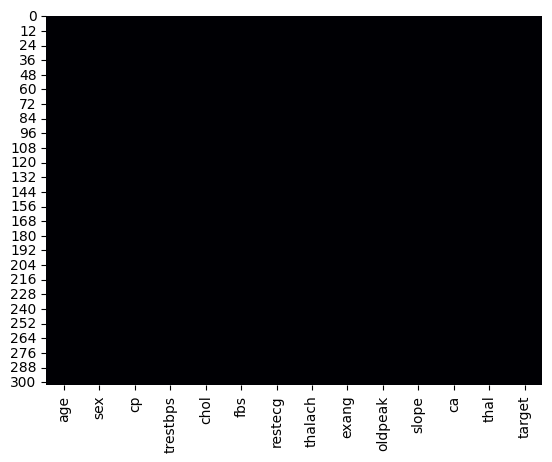

In [47]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [48]:
# prompt: find duplicate

# Assuming 'data' is your pandas DataFrame (as defined in your provided code)
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
duplicate_rows


Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [49]:
# prompt: remove duplicates

data = data.drop_duplicates()


In [50]:
#Number of records after removing Duplicates

print(f"Number of records after removing duplicates: {len(data)}")


Number of records after removing duplicates: 302


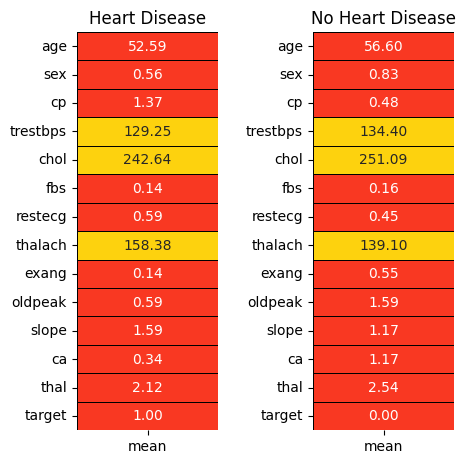

In [51]:
yes = data[data['target'] == 1].describe().T
no = data[data['target'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

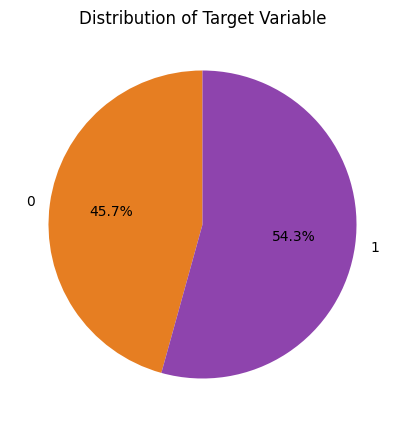

<ipython-input-52-7aff98aaedf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette=['#E67E22','#8E44AD'])


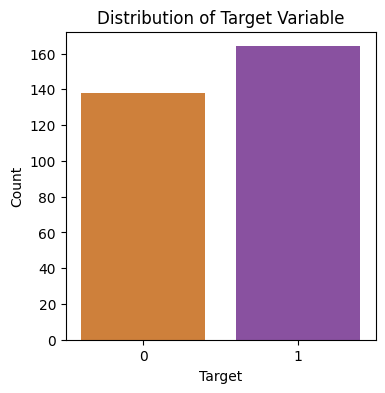

In [52]:
# # Target Variable Visualization (Pie Chart)
plt.figure(figsize=(20,5))
data['target'].value_counts(ascending=True).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#E67E22','#8E44AD'])
plt.title('Distribution of Target Variable')
plt.ylabel('')  # Remove y-axis label
plt.show()

# Target Variable Visualization (Bar Chart)
plt.figure(figsize=(4,4))
sns.countplot(x='target', data=data, palette=['#E67E22','#8E44AD'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


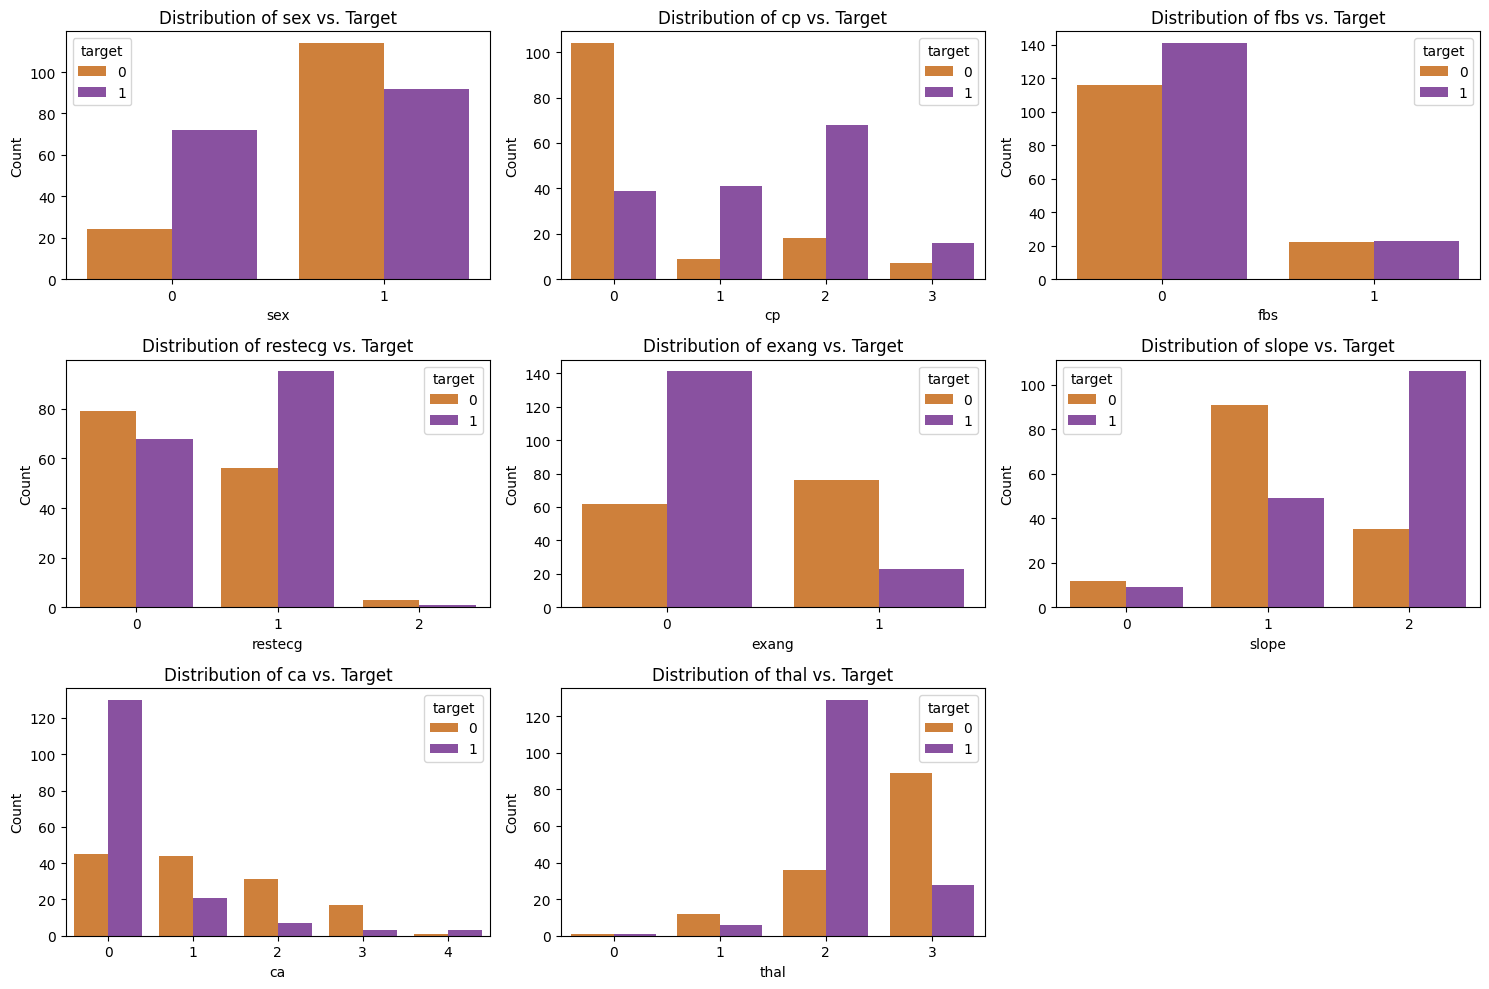

In [53]:
# prompt: categorical feature vs targer variabe

# Plotting categorical features against the target variable
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, hue='target', data=data, palette=['#E67E22','#8E44AD'])
    plt.title(f'Distribution of {feature} vs. Target')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


<ipython-input-54-f120f7c7ba5f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette=['#E67E22','#8E44AD'])
<ipython-input-54-f120f7c7ba5f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette=['#E67E22','#8E44AD'])
<ipython-input-54-f120f7c7ba5f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette=['#E67E22','#8E44AD'])
<ipython-input-54-f120f7c7ba5f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

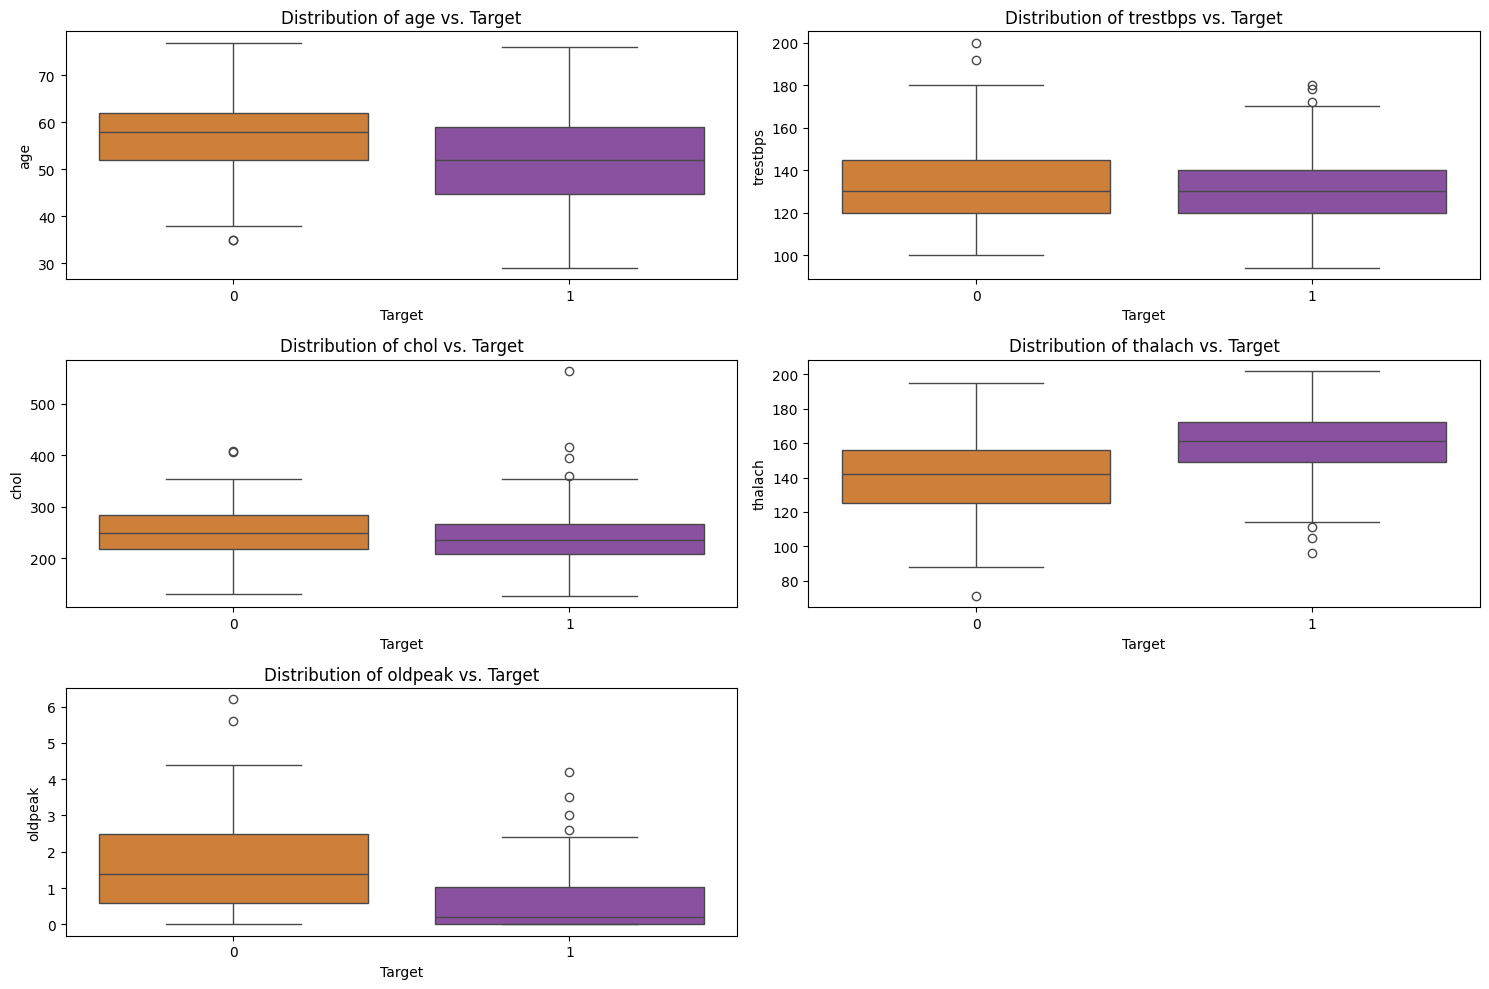

In [54]:
# prompt: Numerical Feature vs Target Variable

# Numerical features vs. target variable
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=data, palette=['#E67E22','#8E44AD'])
    plt.title(f'Distribution of {feature} vs. Target')
    plt.xlabel('Target')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


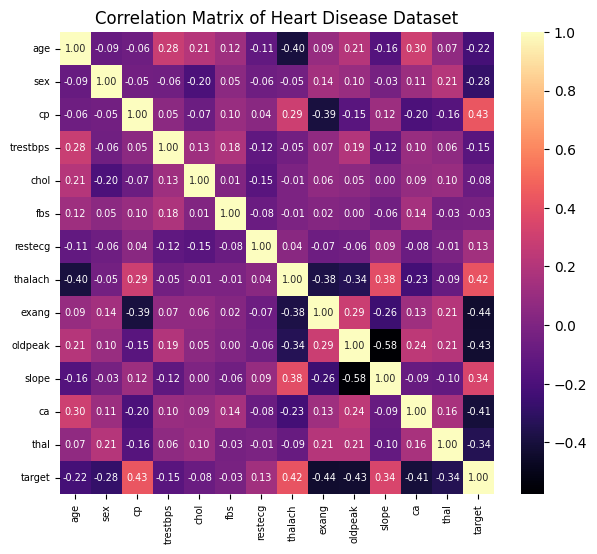

In [55]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f",annot_kws={"size": 7})
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.xticks(fontsize=7) # reduced x tick size
plt.yticks(fontsize=7)
plt.show()


In [56]:
# print correlation table
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## **Model prepration**

In [57]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [58]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 130, 0: 111})

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[22  5]
 [ 3 31]]


Accuracy of Logistic Regression: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [61]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[24  3]
 [ 3 31]]


Accuracy of Naive Bayes model: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [62]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[23  4]
 [ 4 30]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [63]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[13 14]
 [ 0 34]]


Accuracy of Extreme Gradient Boost: 77.04918032786885 

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        27
           1       0.71      1.00      0.83        34

    accuracy                           0.77        61
   macro avg       0.85      0.74      0.74        61
weighted avg       0.84      0.77      0.75        61



In [64]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [65]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[21  6]
 [10 24]]


Accuracy of DecisionTreeClassifier: 73.77049180327869 

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.80      0.71      0.75        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [66]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[26  1]
 [ 3 31]]


Accuracy of Support Vector Classifier: 93.44262295081968 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



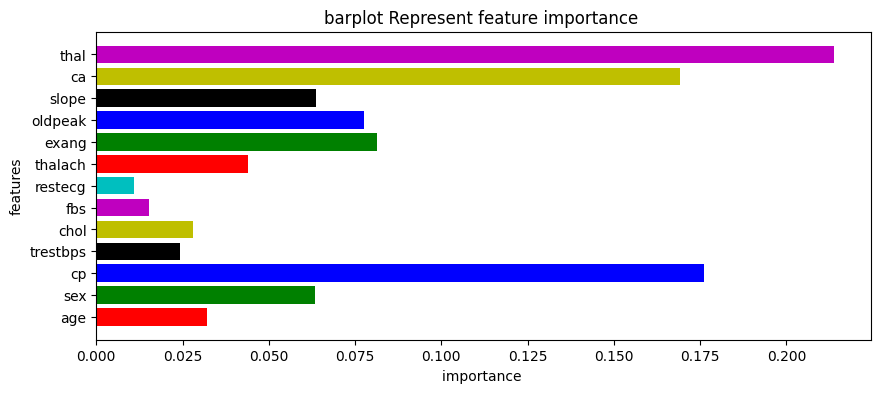

In [67]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
# Changed code: Replace 'rgbkymc' with a valid color sequence
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])
# The above line assigns the colors 'red', 'green', 'blue', 'black', 'yellow', 'magenta', and 'cyan' to the bars in order.
# If there are more bars than colors in the sequence, the colors will cycle through the sequence.
# If you want to use different colors, you can replace the color sequence with other valid color names or RGBA values.
plt.show()

In [68]:
# lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
# nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
# rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
# xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
# knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
# dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
# svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


# sns.set_style('whitegrid')
# plt.figure(figsize=(10,5))
# plt.title('Reciver Operating Characterstic Curve')
# plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
# plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
# plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
# plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
# plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
# plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
# plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
# plt.plot([0,1],ls='--')
# plt.plot([0,0],[1,0],c='.5')
# plt.plot([1,1],c='.5')
# plt.ylabel('True positive rate')
# plt.xlabel('False positive rate')
# plt.legend()
# plt.show()

In [40]:
!pip install catboost

In [33]:
m8 = 'CatBoost Classifier'
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0) # Added verbose=0 to suppress output
cat.fit(X_train, y_train)
cat_predicted = cat.predict(X_test)
cat_conf_matrix = confusion_matrix(y_test, cat_predicted)
cat_acc_score = accuracy_score(y_test, cat_predicted)
print("confussion matrix")
print(cat_conf_matrix)
print("\n")
print("Accuracy of CatBoost Classifier:",cat_acc_score*100,'\n')
print(classification_report(y_test,cat_predicted))


confussion matrix
[[22  5]
 [ 6 28]]


Accuracy of CatBoost Classifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [34]:
# prompt: Implement Voting Classifier

from sklearn.ensemble import VotingClassifier

# Define the individual classifiers
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
clf3 = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27,
                     reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
clf4 = KNeighborsClassifier(n_neighbors=10)
clf5 = SVC(kernel='rbf', C=2, probability=True) # probability=True is needed for soft voting
clf6 = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0) # verbose=0 to suppress output


# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('knn', clf4), ('svc', clf5), ('catboost', clf6)], voting='soft')


# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
voting_clf_predicted = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
voting_clf_conf_matrix = confusion_matrix(y_test, voting_clf_predicted)
voting_clf_acc_score = accuracy_score(y_test, voting_clf_predicted)
print("Confusion Matrix for Voting Classifier:")
print(voting_clf_conf_matrix)
print("\n")
print("Accuracy of Voting Classifier:", voting_clf_acc_score * 100, '\n')
print(classification_report(y_test, voting_clf_predicted))


Confusion Matrix for Voting Classifier:
[[23  4]
 [ 2 32]]


Accuracy of Voting Classifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [35]:
# prompt: Compare all Models

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Assuming the models (lr, nb, rf, xgb, knn, dt, svc, cat) and predictions (lr_predict, nbpred, etc.) are already defined as in your provided code.

models = {
    'Logistic Regression': (lr, lr_predict),
    'Naive Bayes': (nb, nbpred),
    'Random Forest': (rf, rf_predicted),
    'Extreme Gradient Boost': (xgb, xgb_predicted),
    'K-Nearest Neighbors': (knn, knn_predicted),
    'Decision Tree': (dt, dt_predicted),
    'Support Vector Classifier': (svc, svc_predicted),
    'CatBoost Classifier': (cat, cat_predicted),
    'Voting Classifier': (voting_clf, voting_clf_predicted)
}

results = []
for model_name, (model, predictions) in models.items():
  acc = accuracy_score(y_test, predictions)
  report = classification_report(y_test, predictions, output_dict=True)
  results.append({
      'Model': model_name,
      'Accuracy': acc,
      'Precision': report['weighted avg']['precision'],
      'Recall': report['weighted avg']['recall'],
      'F1-score': report['weighted avg']['f1-score']
  })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.868852,0.869472,0.868852,0.868204
1,Naive Bayes,0.901639,0.901639,0.901639,0.901639
2,Random Forest,0.868852,0.868852,0.868852,0.868852
3,Extreme Gradient Boost,0.770492,0.837432,0.770492,0.749920
4,K-Nearest Neighbors,0.885246,0.886098,0.885246,0.885433
5,Decision Tree,0.737705,0.745743,0.737705,0.738553
6,Support Vector Classifier,0.934426,0.936793,0.934426,0.934604
7,CatBoost Classifier,0.819672,0.820701,0.819672,0.819966
8,Voting Classifier,0.901639,0.902659,0.901639,0.901153


In [36]:
# prompt: Compare all models and sort them

# Sort the models by accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1-score
6,Support Vector Classifier,0.934426,0.936793,0.934426,0.934604
1,Naive Bayes,0.901639,0.901639,0.901639,0.901639
8,Voting Classifier,0.901639,0.902659,0.901639,0.901153
4,K-Nearest Neighbors,0.885246,0.886098,0.885246,0.885433
0,Logistic Regression,0.868852,0.869472,0.868852,0.868204
2,Random Forest,0.868852,0.868852,0.868852,0.868852
7,CatBoost Classifier,0.819672,0.820701,0.819672,0.819966
3,Extreme Gradient Boost,0.770492,0.837432,0.770492,0.749920
5,Decision Tree,0.737705,0.745743,0.737705,0.738553


In [37]:
# prompt: Save the best model and use it for doing real time prediction

import joblib

# Find the best model based on accuracy
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name][0]

# Save the best model
joblib.dump(best_model, 'best_heart_attack_model.pkl')
joblib.dump(scaler, 'scaler.pkl') #save scaler

# Load the saved model and scaler for real-time prediction
loaded_model = joblib.load('best_heart_attack_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

def predict_heart_attack(features):
    # Assuming 'features' is a list or numpy array of the input features
    features_scaled = loaded_scaler.transform([features]) #scale the features before prediction
    prediction = loaded_model.predict(features_scaled)[0]
    return prediction

# Example usage:
#new_patient_data = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
new_patient_data = [50,0,1,120,244,0,1,162,0,1.1,2,0,2] #Example Input
prediction = predict_heart_attack(new_patient_data)
print(f"Prediction for new patient: {prediction}")


Prediction for new patient: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Save the model using pickle
import pickle

# Assuming your trained model is stored in the 'svc' variable
# Replace 'svc' with the actual variable name if different
model_filename = 'heart_attack_model.pkl'  # Choose a filename for your model
with open(model_filename, 'wb') as file:
    pickle.dump(svc, file)

print(f"Model saved to {model_filename}")

Model saved to heart_attack_model.pkl


In [39]:
# prompt: Do real time prediction

import pickle
import numpy as np

# Load the saved model
model_filename = 'heart_attack_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Example of new data for prediction (replace with your actual data)
# Ensure the new data has the same features and scaling as the training data
new_data = np.array([[44,0,2,108,141,0,1,175,0,0.6,1,0,2]])

# Scale the new data using the same scaler used for training
# scaler = StandardScaler()  # You'll need to load the scaler if it was saved separately.
new_data = scaler.transform(new_data)  # Apply the same scaling


# Make predictions on the new data
predictions = loaded_model.predict(new_data)

print("Prediction:", predictions)


# For real-time prediction in an application:
# 1. Get input data from the user or other sources.
# 2. Preprocess the input data in the same way as the training data (e.g., scaling, handling missing values, feature engineering)
# 3. Use the loaded_model.predict() method to get the prediction.
# 4. Display or use the prediction as needed.



Prediction: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Ensembling**

> **In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.**

# **Conclusion**

1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.

**Feel free to ask any question related to this topic. I'm happy to answer. If you like my work don't hesitate to upvote.**

**HAPPY LEARNING :-)**